In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact
# import networkx as nx
import pandas as pd

mpl.rcParams['figure.figsize'] = [6.0, 6.0]

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

# Warm up

Please fill out a [quick survey](https://docs.google.com/forms/d/e/1FAIpQLSdbbHtKpsM58SMd_-v9_cQWeFP8dg57ooa9yShbzKYkIeK7Aw/viewform).


In [5]:
display(IFrame("https://docs.google.com/forms/d/e/1FAIpQLSdbbHtKpsM58SMd_-v9_cQWeFP8dg57ooa9yShbzKYkIeK7Aw/viewform?embedded=true",width=625,height=640))

Welcome to APMA E2000

<img src="img/tmp.gif" width="50%" style="float:right" />

# MVC
Drew C Youngren

<code>dcy2@columbia.edu</code>

<p style="padding-bottom:40%;"> </p>

## Where are we?

In [9]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRwge0i83wewA-X4G6ki5zhdPfcDRyHBbwH7hAA5XeWJTfL_IaZAkfINu4ZCESyRrbqRkk_SndUZE3H/pub?gid=1016261283&single=true&output=csv"
df = pd.read_csv(url)
locs = df["What city are you in?"].tolist()
loc_library = {}

try:
    import ipyleaflet
    has_maps = True
except:
    has_maps = False

try:
    import geopy
    has_geo = True
except:
    has_geo = False

In [10]:
if has_maps:
    from time import sleep
    import pickle
    try:
        with open("loc_library.pickle","rb") as fin:
            loc_library = pickle.load(fin)
    except:
        loc_library = {}
        
    CU = (40.8080768,-73.9671954) # lat/long of Morningside campus
    m = ipyleaflet.Map(center = CU,zoom=10)
    display(m)
    mkr = ipyleaflet.Marker(location=CU,opacity=1,draggable=False)
    m.add_layer(mkr)
    app = geopy.geocoders.Nominatim(user_agent="mvc-lecture_01")
    for s in locs:
        if s in loc_library:
            loc = loc_library[s]
        elif has_geo:
            sleep(1.1)
            loc = app.geocode(s)
            if loc:
                loc = loc.raw
                loc_library[s] = loc
        
        if loc:
            lalo = tuple(np.array((float(loc['lat']),float(loc['lon']))) + (np.random.random(2)-.5)*5e-2)
            mkr = ipyleaflet.Marker(location=lalo,opacity=.6,draggable=False,name=s)
            m.add_layer(mkr)
        else:
            print(f"{s} NOT FOUND")
    try: 
        with open("loc_library.pickle",'wb') as fileout:
             pickle.dump(loc_library,fileout)
    except:
        pass

        

Map(center=[40.8080768, -73.9671954], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

New York City (dorming) // Hometown: Katy, TX NOT FOUND
New York, NY (on-campus, but from Reno, NV) NOT FOUND
Atlanta, Georgis  NOT FOUND
Stonignton, CT NOT FOUND
Plano (it is plain, oh.) NOT FOUND
from Hunterdon County NJ, but living on-campus NOT FOUND
Minneapolis-St. Paul area, MN, US NOT FOUND


# What is calculus?

In [12]:
from wordcloud import WordCloud
import re

pat = re.compile(r"[^\w']+")   
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRwge0i83wewA-X4G6ki5zhdPfcDRyHBbwH7hAA5XeWJTfL_IaZAkfINu4ZCESyRrbqRkk_SndUZE3H/pub?gid=1016261283&single=true&output=csv"
df = pd.read_csv(url)
wds = df.loc[df["Calculus is..."].notnull(),"Calculus is..."].tolist()
wds = [item.lower() for w in wds for item in pat.split(w)]
wds = [w for w in wds if w not in ["the","a","with","among","an","of","in","to","for","is","that","it","was","us","you","if","not","i"]]
wc = WordCloud(background_color="#EEEEFF00",width = 600,height=400).generate(' '.join(wds))

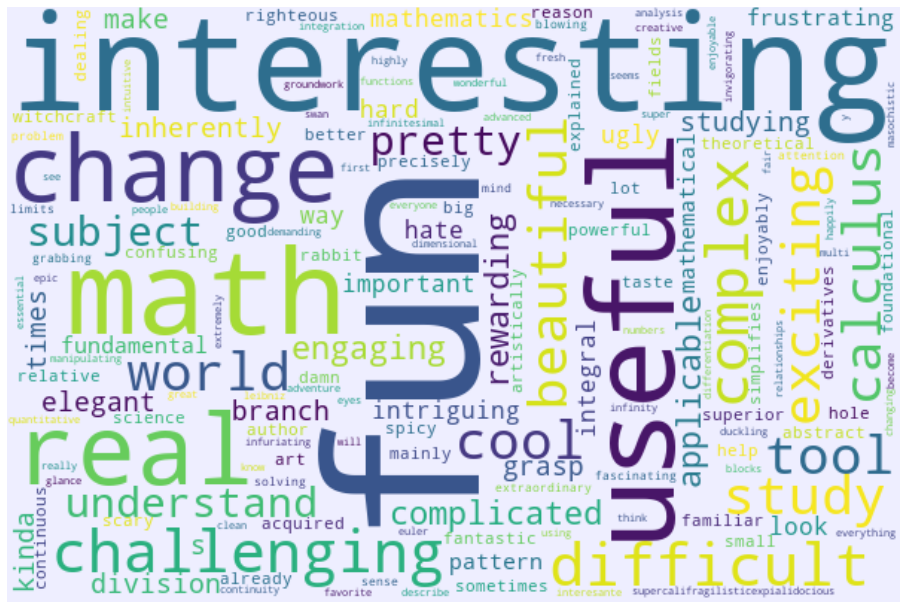

In [13]:
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off");

<p style="padding-bottom:40%;"> </p>

In case that didn't work, here's last semester's:

![Calculus is...wordcloud](../img/calculus-worcloud.png)

  # What is Multivariable Calculus?
  
  In the first two semesters of calculus, the object of study are functions from the real numbers to the real numbers.
  
  $$f: \RR \to \RR$$

In multivariable calculus, we'll expand this study in three ways:

  - Vector-valued functions (curves) $$f:\RR \to \RR^n$$

  - Functions of several variables (scalar fields) $$f:\RR^n \to \RR$$

  - Vector fields $$f:\RR^n \to \RR^n$$

<p style="padding-bottom:40%;"> </p>

## What is $\RR^n$?

$$ \RR = \RR^1 = \text{ the real numbers}$$

$$\RR^2 = \{ (x,y): x,y \in \RR \} = \text{ the Cartesian plane}$$

$$\RR^3 = \{ (x,y,z): x,y,z \in \RR \} = \text{ 3-space}$$

$$\dots$$ $$ \RR^n = n\text{-space}$$

## Loci

A set of points in space determined by some condition is called a **locus**. These are often solution sets to equations. Many examples involve the distance formula.

### Examples

  1. $x + y = 3$

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

@interact
def _(angle=(-96,96,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    # R = np.sqrt(X**2 + Y**2)
    Z = -3*X

    ax.set_xlabel("$x$",fontsize=16)
    ax.set_ylabel("$y$",fontsize=16)
    ax.set_zlabel("$z$",fontsize=16)


    # Plot the surface.

    ax.view_init(30,angle)
    ax.plot_surface(X, 3-X, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True,alpha=.8)

interactive(children=(IntSlider(value=0, description='angle', max=96, min=-96, step=6), Output()), _dom_classe…

## Distance

The formula for the distance between two points $(x_1,...,x_n)$ and $(y_1,...,y_n)$ in $\RR^n$ is trivial if you just remember the Pythagorean Theorem.

$$d = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

  2. $x^2 + y^2 +z^2 = 1$

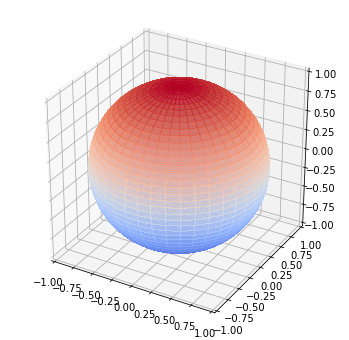

In [19]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(0, 2*np.pi,80)
y = np.linspace(0, np.pi,40)
x, y = np.meshgrid(x, y)
X = np.sin(y)*np.cos(x)
Y = np.sin(y)*np.sin(x)
Z = np.cos(y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0.2, antialiased=False,alpha=.8)
for dim in 'xyz':
    getattr(ax, f'set_{dim}lim')([-1,1])


# Vectors

A **vector** in $\RR^n$ is a directed line segment $\overrightarrow{AB}$ between two points. 

Two vectors are considered the same if they have the same *magnitude* (length) and *direction*.

In [157]:
def plot_vector(v,base=(0,0),**kwargs):
    """Plots a vector `v` with tail at the point `base` (defaults to origin)."""
    plt.arrow(base[0],base[1],v[0],v[1],length_includes_head=True,head_width=.2,**kwargs);

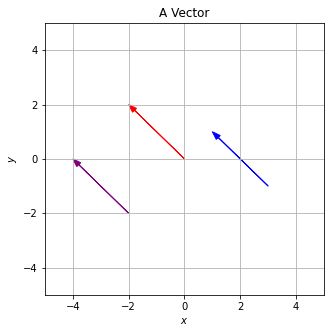

In [112]:
v = np.array([-2,2])
w = np.array([3,-4])

fig = plt.figure(figsize=(5,5))

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("A Vector");

plot_vector(v,color='r')
plot_vector(v,base=(3,-1),color='b')
plot_vector(v,base=(-2,-2),color='purple')
plt.grid(True);

<p style="padding-bottom:40%;"> </p>

## Notation

We specify a vector by the displacement in each component. E.g., $$\vec v = \langle 3,1 \rangle = \bv{3 \\ 1}.$$

### Analogy

$(3,21)$ is a point. $\vec v = \langle 3,21\rangle$ is a vector. 

"21st St & 3rd Ave" is a location. "21 blocks north and 3 blocks west" is a displacement. 

<p style="padding-bottom:40%;"> </p>

# Vector Operations

The most important aspect of vectors is what you can do with/to them. In a sense their defining feature is that they can be **scaled** and **added together**.

Let $\vec v = \langle v_1, v_2, v_3 \rangle$.

### Magnitude

The **magnitude** of a vector $\vec v$ is a (nonnegative) scalar $|\vec v|$ (also written $\| \vec v \|$). 

$$|\vec v| = \sqrt{v_1^2 +v_2^2 + v_3^2}$$

## Scalar multiplication

Let $c$ be a scalar. $$c\vec v = \langle c v_1, c v_2, c v_3\rangle$$

In [61]:
@interact
def _(s=(-1,3.)):
    plt.xlim([-6,6])
    plt.ylim([-6,6])
    plt.grid(True)
    plt.arrow(0,0,3,1,color='b',head_width=.2,length_includes_head=True)
    plt.arrow(0,0,s*3,s,color="gray",alpha=.6,head_width=.2,length_includes_head=True)

interactive(children=(FloatSlider(value=1.0, description='s', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

# Short exercises

  1. Complete the identity $$|c\vec v| = $$
  2. Find a **unit vector** (a vector of length 1) in the direction of $\langle 3,12,-4 \rangle $.

<p style="padding-bottom:40%;"> </p>

## Vector addition

Let $\vec w = \langle w_1,w_2,w_3 \rangle$. $$\vec v + \vec w = \langle v_1 +w_1, v_2+w_2, v_3+w_3 \rangle$$

In [62]:
@interact
def _(w1=(-2,2.),w2=(-2,2.)):
    v = np.array((3,1))
    w = np.array((w1,w2))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.grid(True)
    plt.arrow(0,0,3,1,color='b',head_width=.2,length_includes_head=True)
    plt.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True)
    plt.arrow(v[0],v[1],(w)[0],(w)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
    plt.arrow(w[0],w[1],(v)[0],(v)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
    plt.arrow(0,0,(v+w)[0],(v+w)[1],color="purple",alpha=1,head_width=.2,length_includes_head=True)

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

<p style="padding-bottom:40%;"> </p>

# Linear combinations

A **linear combination** of vectors $\vec v$ and $\vec w$ is a vector $$a\vec v + b \vec w$$where $a$ and $b$ are arbitrary scalars. 

#### Example - important

$$\vec v - \vec w = \vec v + (-1) \vec w$$ is the **difference** between two vectors.

Plot the vectors $\vec v = \langle 3,1 \rangle$, $\vec w = \langle -2,2\rangle$, and the difference $\vec v - \vec w$.

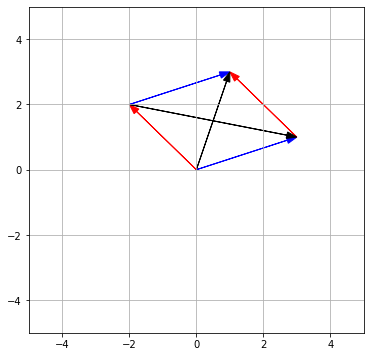

In [164]:
v = np.array([3,1])
w = np.array([-2,2])

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid(True)

plot_vector(v,color='b')
plot_vector(v,color='b',base=w)

plot_vector(w,color='r')
plot_vector(w,color='r',base=v)

plot_vector(v - w,color='k',base=w)
plot_vector(v + w,color='k')


#### Exercise
 
  1. Plot the the following linear combinations of the vectors $\vec v = \langle 3,1 \rangle$ and $\vec w = \langle -2,2\rangle$:
      
    1. $\vec v+\vec w$
    2. $\frac{\vec v + \vec w}{2}$
    3. $2\vec w - \vec v$

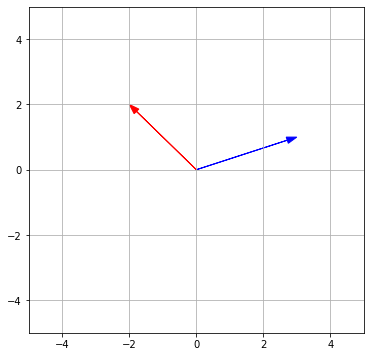

In [116]:
v = np.array([3,1])
w = np.array([-2,2])

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid(True)

plot_vector(v,color='b')
plot_vector(w,color='r')


  2. (extra) What linear combination is this? $$ .2 \vec h + .2\vec q + .35 \vec m + .25 \vec f$$
  

<p style="padding-bottom:40%;"> </p>

# Dot product

We do not simply _multiply_ vectors, per se, but there are special products we take. 

The **dot product** (or scalar product or inner product) between two vectors $\vec v = \langle v_1, \dots,v_n\rangle$ and $\vec w = \langle w_1, \dots,w_n\rangle$ is given by

$$\vec v\cdot \vec w = \sum_{i=1}^n v_i w_i $$

In [121]:
@interact
def _(w1=(-2,2.,.5),w2=(-2,2.,.5)):
    v = np.array((3,1))
    w = np.array((w1,w2))
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.grid(True)
    plt.arrow(0,0,3,1,color='b',head_width=.2,length_includes_head=True)
    plt.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True)
#     plt.arrow(v[0],v[1],(w)[0],(w)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
#     plt.arrow(w[0],w[1],(v)[0],(v)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
#     plt.arrow(0,0,(v+w)[0],(v+w)[1],color="purple",alpha=1,head_width=.2,length_includes_head=True)
    plt.title(f"$\\vec v \\cdot \\vec w = {np.dot(v,w)}$")

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0, step=0.5), FloatSlider(value…

<p style="padding-bottom:40%;"> </p>

# Properties of the dot product

The dot product is:

  - commutative $$\vec v \cdot \vec w = \vec w \cdot \vec v$$

  - bilinear $$(c\vec v + d\vec w )\cdot \vec u = c(\vec v\cdot \vec u) + d(\vec w\cdot \vec u)$$

It can be used to define the magnitude. $$|\vec v|^2 = \vec v \cdot \vec v$$

There is a special vector $\vec 0 = \langle 0,0,\dots,0\rangle$, and for all $\vec v$, $$\vec v\cdot \vec 0 = 0$$

## The Most Important Property

Observe what happens with the angles. 

In [122]:
@interact
def _(w1=(-2,2.,.5),w2=(-2,2.,.5),th=(-np.pi,np.pi)):
    A = np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
    v = A.dot(np.array((3,1)))
    w = A.dot(np.array((w1,w2)))
#     print(A*v)
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.grid(True)
    plt.arrow(0,0,v[0],v[1],color='b',head_width=.2,length_includes_head=True)
    plt.arrow(0,0,w[0],w[1],color="r",alpha=1,head_width=.2,length_includes_head=True)
#     plt.arrow(v[0],v[1],(w)[0],(w)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
#     plt.arrow(w[0],w[1],(v)[0],(v)[1],color="gray",alpha=.6,head_width=.2,length_includes_head=True)
#     plt.arrow(0,0,(v+w)[0],(v+w)[1],color="purple",alpha=1,head_width=.2,length_includes_head=True)
    plt.title(f"$\\vec v \\cdot \\vec w = {np.dot(v,w):.02f}$")

interactive(children=(FloatSlider(value=0.0, description='w1', max=2.0, min=-2.0, step=0.5), FloatSlider(value…

$$ \vec v \cdot \vec w = |\vec v ||\vec w| \cos \theta$$ where $\theta$ is the angle between them.

**Corollary**

$$ |\vec v \cdot \vec w| \leq |\vec v ||\vec w| $$

### Exercise

Show that for all vectors $\vec v$ and $\vec w$,

$$\vec v \cdot \vec w \leq \frac{|\vec v|^2 + |\vec w|^2}{2}.$$

# Wrap-up
It's a good practice to do some reflective soon after every session. It need not be a long, contemplative essay. What is something you remember? What is one thing that confused you. Etc. 

One idea: submit candidates for a class glossary. A term or phrase that was uttered during class that you were not sure about. The form below will stay open.


In [123]:
display(IFrame("https://docs.google.com/forms/d/e/1FAIpQLSdBcQRGFTjkR0xbgIZX_jg7wx83gi3b11ll9cSFpwMTcat_qw/viewform?embedded=true",width=640,height=587))